In [1]:
#!pip install gstools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gstools as gs

#x = y = np.arange(100)
#model = gs.Exponential(dim=2, var=1, len_scale=[25.0, 3.0])
#srf = gs.SRF(model, seed=20170519)
import random
seeds =  [random.randint(1, 10000) for _ in range(30)]
seeds

[1993,
 4456,
 1091,
 2204,
 1457,
 7170,
 3896,
 8729,
 3179,
 8911,
 6322,
 8144,
 7822,
 9247,
 1417,
 3343,
 1365,
 883,
 3480,
 8155,
 4098,
 1605,
 8258,
 390,
 7680,
 7872,
 9543,
 6167,
 5508,
 2948]

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gstools as gs
import random
import numpy as np
import random
lens  = np.zeros([51,2])
# Adjust the alpha and beta parameters to skew the distribution
# Setting alpha < beta will skew the distribution towards the higher end
alpha = 4
beta = 4
alpha2 = 2
beta2 = 4
seeds =  [random.randint(1, 10000) for _ in range(51)]


# Scale the number to the desired range (10 to 50)
min_val = 5
min_val2 = 5
max_val = 70
max_val2 = 30
scales=[1,2,5,10]
for k in scales:
    if k==1:
        for i in range(len(lens)):
            number = random.betavariate(alpha, beta)
            skewed_number1 = min_val + (max_val - min_val) * number
            lens[i,0] = skewed_number1
            rounded1 = round(skewed_number1)
            number = random.betavariate(alpha2, beta2)
            skewed_number2 = min_val2 + (max_val2 - min_val2) * number
            lens[i,1] = skewed_number2
            rounded2 = round(skewed_number2)
            x =  np.arange(200*(k))
            y =  np.arange(100)
            model = gs.Gaussian(dim=2, var=1e8, len_scale=[skewed_number1, skewed_number2])
            srf = gs.SRF(model, seed=seeds[i])
            field = srf((x, y), mesh_type="structured")
            np.savetxt("gstools/gstools_"+str(rounded1)+"_"+str(rounded2)+"_"+str((k))+"xscale.csv", field, delimiter=",")
    else:
        for i in range(len(lens)):

            skewed_number1 = lens[i,0] 
            rounded1 = round(skewed_number1)

            skewed_number2 = lens[i,1] 
            rounded2 = round(skewed_number2)
            x =  np.arange(200*(k))
            y =  np.arange(100)
            model = gs.Gaussian(dim=2, var=1e8, len_scale=[skewed_number1, skewed_number2])
            srf = gs.SRF(model, seed=seeds[i])
            field = srf((x, y), mesh_type="structured")
            np.savetxt("gstools/gstools_"+str(rounded1)+"_"+str(rounded2)+"_"+str((k))+"xscale.csv", field, delimiter=",")
            

In [8]:
skewed_number2

0.0

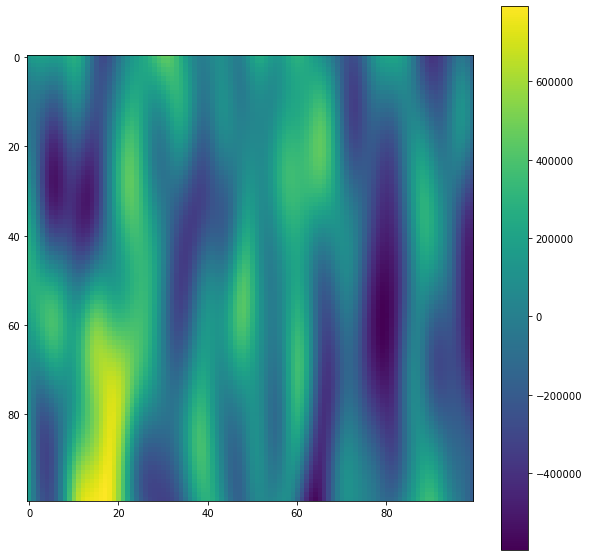

In [26]:
x = y = np.arange(100)
model = gs.Gaussian(dim=2, var=1e11, len_scale=[5.0, 25.0])
srf = gs.SRF(model, seed=20171528)
field = srf((x, y), mesh_type="structured")
field
plt.figure(figsize=(10,10))
plt.imshow(field.T)
plt.colorbar()
np.savetxt("gstools_perm_1_5r.csv", field, delimiter=",")

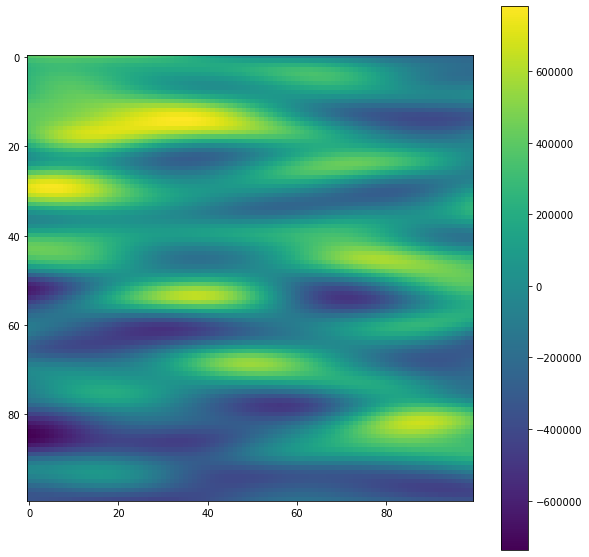

In [22]:
x = y = np.arange(100)
model = gs.Gaussian(dim=2, var=1e11, len_scale=[25.0, 5.0])
srf = gs.SRF(model, seed=20171521)
field = srf((x, y), mesh_type="structured")
field
plt.figure(figsize=(10,10))
plt.imshow(field.T)
plt.colorbar()


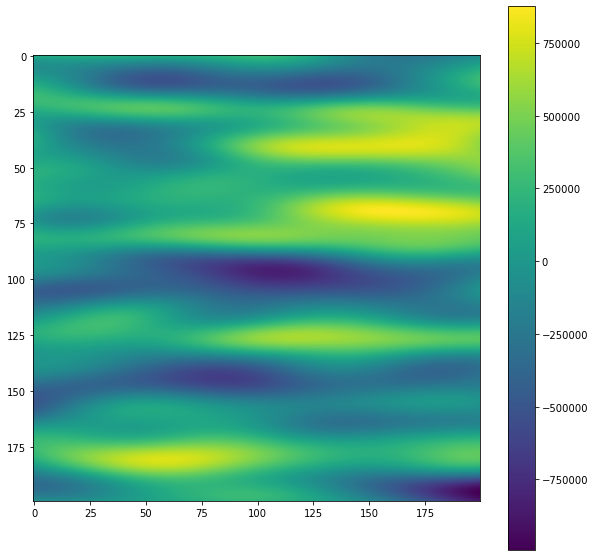

In [12]:
x = y = np.arange(200)
model = gs.Gaussian(dim=2, var=1e11, len_scale=[50.0, 10.0])
srf = gs.SRF(model, seed=20171528)
field = srf((x, y), mesh_type="structured")
field
plt.figure(figsize=(10,10))
plt.imshow(field.T)
plt.colorbar()
np.savetxt("gstools_poros.csv", field, delimiter=",")

In [87]:
field=field/1e6


In [91]:
np.max(field)
np.min(field)

-0.7233090322955879